In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [77]:
# Load the data
normal_data = pd.read_csv('datasets/ptbdb_normal.csv', header=None)
abnormal_data = pd.read_csv('datasets/ptbdb_abnormal.csv', header=None)

# Check data shape
print(f"Normal data shape: {normal_data.shape}")
print(f"Abnormal data shape: {abnormal_data.shape}")

Normal data shape: (4046, 188)
Abnormal data shape: (10506, 188)


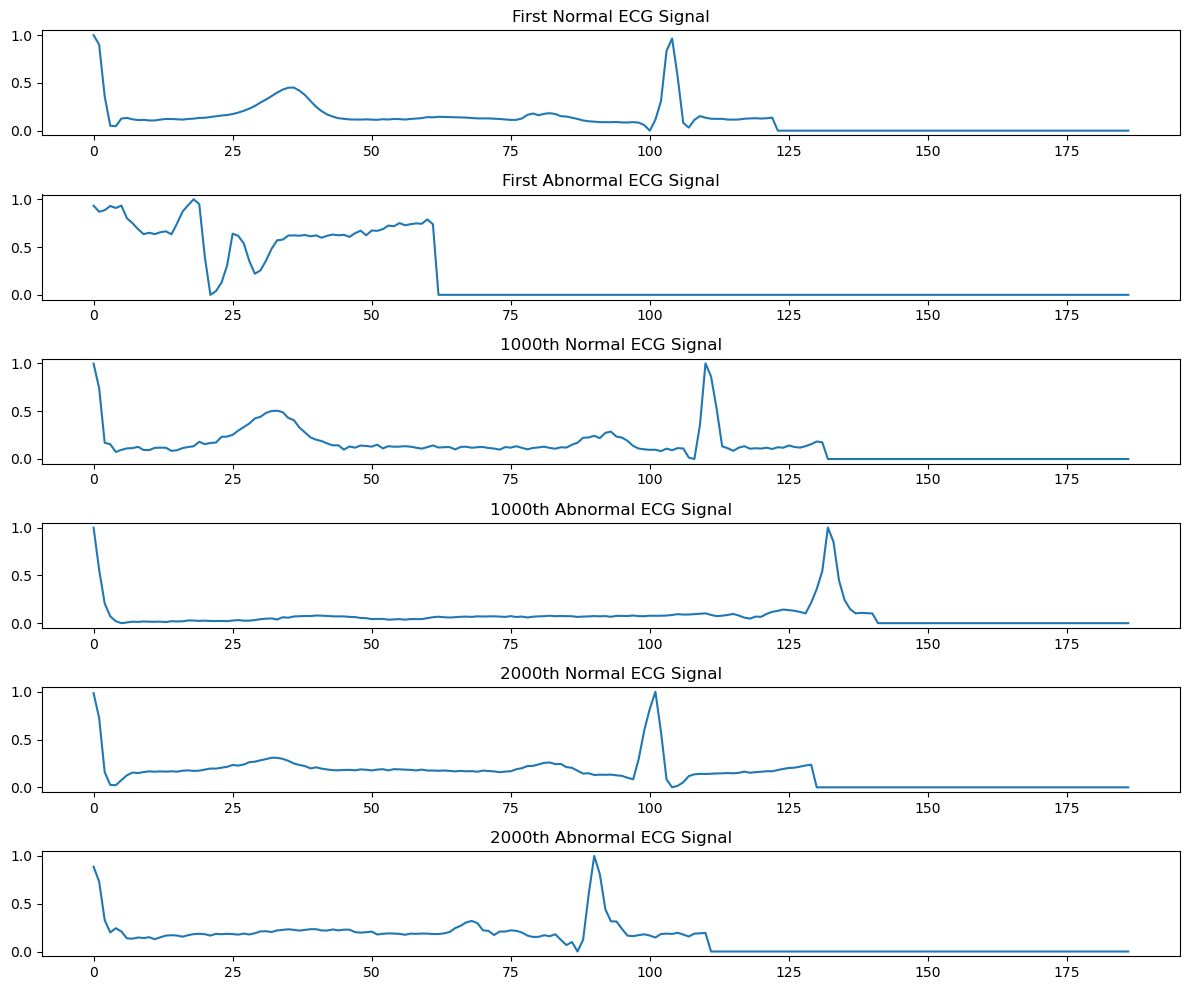

In [68]:
fig, axes = plt.subplots(6, 1, figsize=(12, 10))
axes[0].plot(normal_data.iloc[0, : -1])
axes[0].set_title("First Normal ECG Signal")
axes[1].plot(abnormal_data.iloc[0, : -1])
axes[1].set_title("First Abnormal ECG Signal")
axes[2].plot(normal_data.iloc[1000, : -1])
axes[2].set_title("1000th Normal ECG Signal")
axes[3].plot(abnormal_data.iloc[1000, : -1])
axes[3].set_title("1000th Abnormal ECG Signal")
axes[4].plot(normal_data.iloc[2000, : -1])
axes[4].set_title("2000th Normal ECG Signal")
axes[5].plot(abnormal_data.iloc[2000, : -1])
axes[5].set_title("2000th Abnormal ECG Signal")
plt.tight_layout()

In [69]:
def get_ecg_stats(data):
    stats = {
        'mean': np.mean(data.values),
        'std': np.std(data.values),
        'min': np.min(data),
        'max': np.max(data),
        'median': np.median(data),
        '25th_percentile': np.percentile(data, 25),
        '75th_percentile': np.percentile(data, 75)
    }
    return stats

normal_stats = get_ecg_stats(normal_data.iloc[:, : -1])
abnormal_stats = get_ecg_stats(abnormal_data.iloc[:, : -1])
print("Normal ECG Signal Statistics:")
print(normal_stats)
print("Abnormal ECG Signal Statistics:")
print(abnormal_stats)


Normal ECG Signal Statistics:
{'mean': 0.15844867511878497, 'std': 0.18098223439650035, 'min': 0.0, 'max': 1.0, 'median': 0.11592379957437515, '25th_percentile': 0.0, '75th_percentile': 0.23557209223508835}
Abnormal ECG Signal Statistics:
{'mean': 0.17983560545670704, 'std': 0.22782495038024, 'min': 0.0, 'max': 1.0, 'median': 0.09435551613569261, '25th_percentile': 0.0, '75th_percentile': 0.28256189823150635}


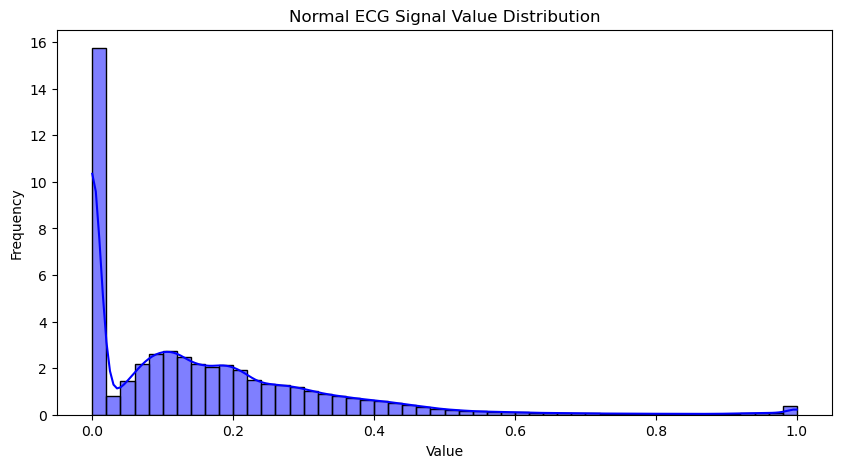

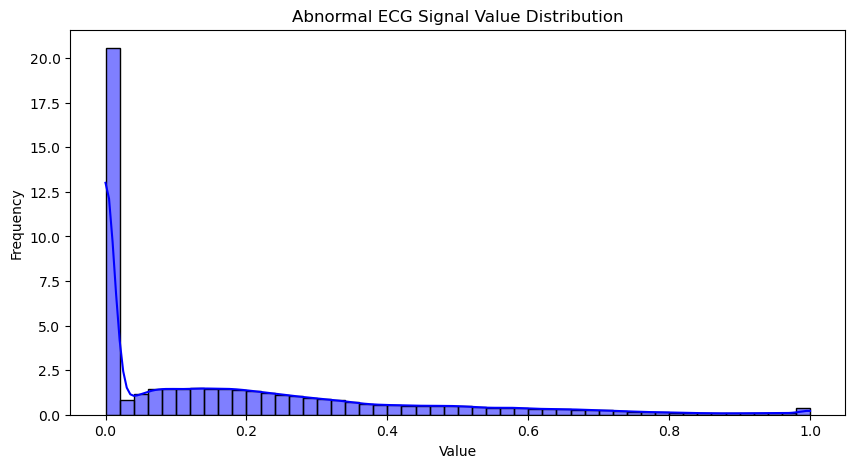

In [47]:
def value_distribution(data, title):
    plt.figure(figsize=(10, 5))
    sns.histplot(data, bins=50, kde=True, color='blue', stat='density')
    plt.title(title)
    plt.xlabel("Value")
    plt.ylabel("Frequency")
    plt.show()

value_distribution(normal_data.iloc[:, : -1].values.flatten(), "Normal ECG Signal Value Distribution")
value_distribution(abnormal_data.iloc[:, : -1].values.flatten(), "Abnormal ECG Signal Value Distribution")


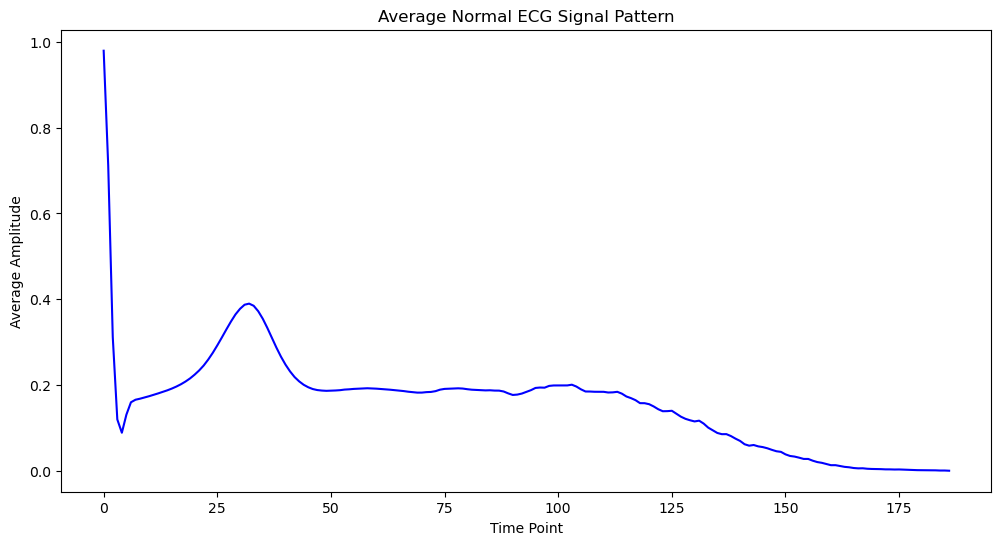

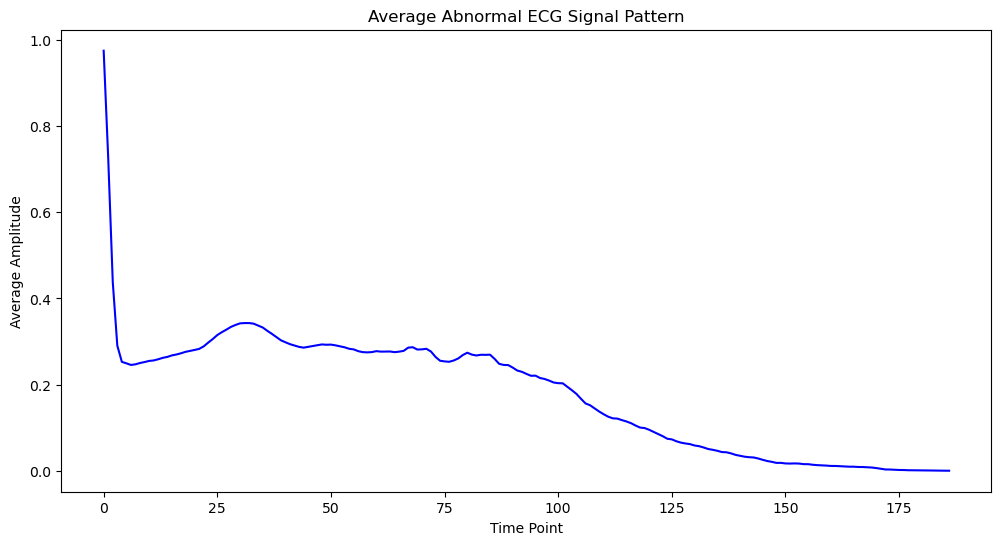

In [70]:
# Calculating and plotting average values for each class's each row besides last column
def avg_pattern_across_samples(data, title):
    avg_pattern = data.iloc[:, :-1].mean(axis=0)
    plt.figure(figsize=(12, 6))
    plt.plot(avg_pattern, color='blue')
    plt.title(title)
    plt.xlabel("Time Point")
    plt.ylabel("Average Amplitude")
    plt.show()

avg_pattern_across_samples(normal_data, "Average Normal ECG Signal Pattern")
avg_pattern_across_samples(abnormal_data, "Average Abnormal ECG Signal Pattern")

# This gives us the "typical" pattern of a heartbeat by averaging thousands of samples at each time point.


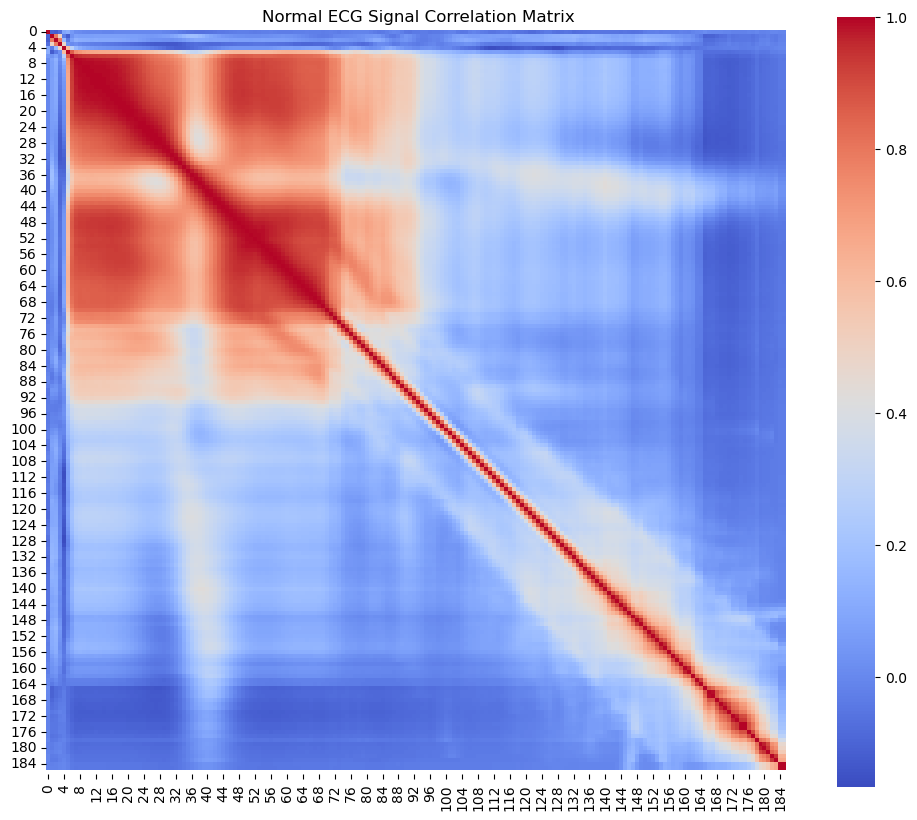

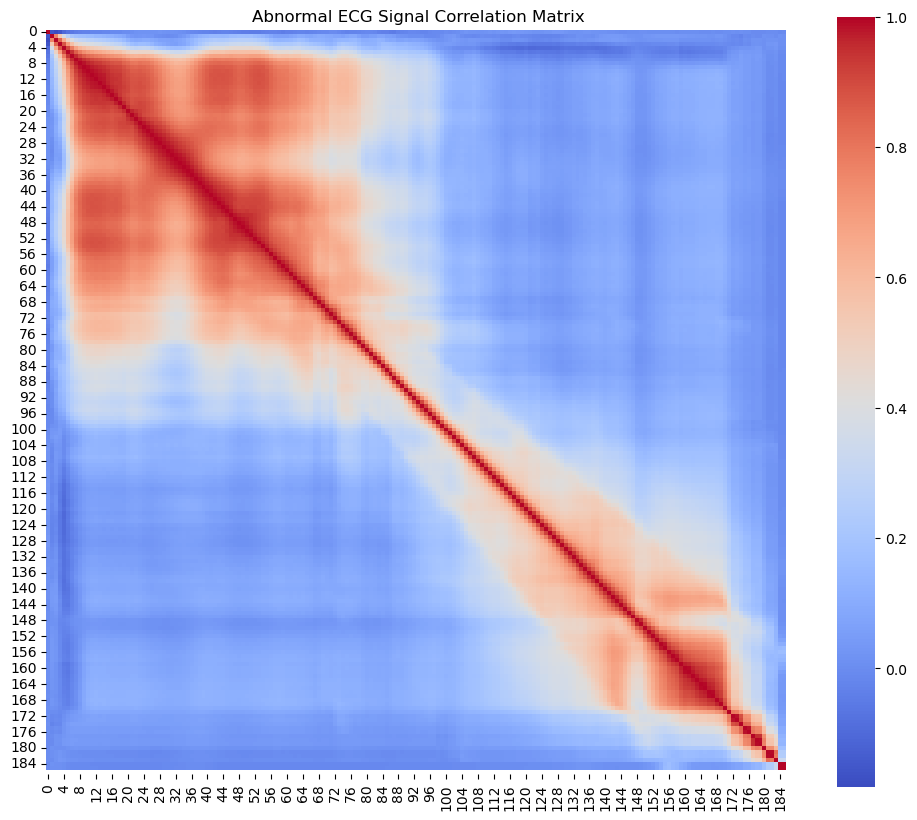

In [71]:
def correlation_matrix(data, title):
    corr = data.iloc[:, :-1].corr()
    plt.figure(figsize=(12, 10))
    sns.heatmap(corr, cmap='coolwarm', annot=False, fmt=".2f", square=True)
    plt.title(title)
    plt.show()

correlation_matrix(normal_data, "Normal ECG Signal Correlation Matrix")
correlation_matrix(abnormal_data, "Abnormal ECG Signal Correlation Matrix")



In [ ]:
# Now let's combine both datasets, remove last column but add labels on which part is normal and which part is abnormal
# Extract the last column as labels
normal_signals = normal_data.iloc[:, :-1]  # Drop the last column
abnormal_signals = abnormal_data.iloc[:, :-1]  # Drop the last column
normal_signals['label'] = 0
abnormal_signals['label'] = 1
combined_data = pd.concat([normal_signals, abnormal_signals], ignore_index=True)


# lets print shape
print(f"Combined data shape: {combined_data.shape}")
# Check the first few rows of the combined data
print(combined_data.head())
# Check the distribution of labels
print(combined_data['label'].value_counts())
# Check for missing values
print(combined_data.isnull().sum())

combined_data.to_csv('combined_ecg_data.csv', index=False)

#Since we added label, the first row is all column numbers besides last column which is label

Combined data shape: (14552, 188)
          0         1         2         3         4         5         6  \
0  1.000000  0.900324  0.358590  0.051459  0.046596  0.126823  0.133306   
1  1.000000  0.794681  0.375387  0.116883  0.000000  0.171923  0.283859   
2  0.909029  0.791482  0.423169  0.186712  0.000000  0.007836  0.063032   
3  1.000000  0.478893  0.056760  0.064176  0.081289  0.072732  0.055619   
4  1.000000  0.867238  0.201360  0.099349  0.141336  0.120934  0.108516   

          7         8         9  ...  178  179  180  181  182  183  184  185  \
0  0.119125  0.110616  0.113047  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
1  0.293754  0.325912  0.345083  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
2  0.077002  0.074957  0.077342  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
3  0.048774  0.054478  0.041643  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   
4  0.096393  0.093436  0.100828  ...  0.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0   

   186  label  
0  0.0      0  
1 